In [1]:
"""
Only for the 1st three buildings
"""

# get train files
import glob

train_folders = ['CAR', 'UAH', 'UJITI', 'UJIUB']

files_names = []
n_files = 0
for building in train_folders:
    cur_file_names = glob.glob('train/' + building + '/log*')
    files_names.append(sorted(cur_file_names))
    n_files += len(cur_file_names)

print(files_names)
print('There are %d files' % n_files)

[['train/CAR/logfile_CAR_R1_S3.txt', 'train/CAR/logfile_CAR_R1_S3mini.txt', 'train/CAR/logfile_CAR_R2_S3.txt', 'train/CAR/logfile_CAR_R2_S4.txt'], ['train/UAH/logfile_UAH_R1_S3.txt', 'train/UAH/logfile_UAH_R1_S4.txt', 'train/UAH/logfile_UAH_R2_S3.txt', 'train/UAH/logfile_UAH_R2_S4.txt', 'train/UAH/logfile_UAH_R4_S3.txt', 'train/UAH/logfile_UAH_R4_S4.txt'], ['train/UJITI/logfile_UJITI_R1_NEXUS5.txt', 'train/UJITI/logfile_UJITI_R2_NEXUS5.txt'], ['train/UJIUB/logfile_UJIUB_R1n_S3.txt', 'train/UJIUB/logfile_UJIUB_R1r_S3.txt', 'train/UJIUB/logfile_UJIUB_R2n_S3.txt', 'train/UJIUB/logfile_UJIUB_R2r_S3.txt', 'train/UJIUB/logfile_UJIUB_R3_S3.txt']]
There are 17 files


In [2]:
# import files into dataframe
import numpy as np
import pandas as pd

track= []
for building in files_names:
    track.append([])
    for track_name in building:
        print(track_name)
        track[-1].append(pd.read_csv(track_name, sep=';', engine='c', names=range(11)))
        print(np.unique(track[-1][-1][0]))

train/CAR/logfile_CAR_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R1_S3mini.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'MAGN' 'POSI' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/CAR/logfile_CAR_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX'
 'SOUN' 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R1_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R4_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logf

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Find time limits per POSI id
def posi_time_limits(pos_array):
    # create start and end index time array
    pos_array['ind_begin_time'] = np.zeros((pos_array.shape[0]))
    pos_array['ind_end_time'] = np.zeros((pos_array.shape[0]))
    pos_array['ind_end_time'].iloc[-1] = 99999

    for i in range(1, pos_array.shape[0]):
        cur_split = (float(pos_array['Time'].iloc[i]) + float(pos_array['Time'].iloc[i-1])) / 2
        pos_array['ind_begin_time'].iat[i] = cur_split       
        pos_array['ind_end_time'].iat[i-1] = cur_split       
    return pos_array

pos = []
for i in range(len(track)):
    pos.append([])
    for j in range(len(track[i])):
        pos[i].append(track[i][j][[1, 2, 3, 4, 5, 6, 7]].iloc[track[i][j][0].values == 'POSI'])
        pos[i][j] = pos[i][j].dropna(axis=1)
        pos[i][j].columns = ['Time', 'index', 'Lat', 'Lon', 'FloorID', 'BuildingID']
        pos[i][j] = posi_time_limits(pos[i][j])
print(pos[0][0].head())

          Time  index          Lat       Lon  FloorID  BuildingID  \
8512    30.341    1.0  40.31347091  -3.48315      0.0        10.0   
13709   48.878    2.0  40.31332032  -3.48312      0.0        10.0   
22475   80.175    3.0  40.31328135  -3.48342      0.0        10.0   
27694   98.724    4.0  40.31331275  -3.48342      0.0        10.0   
38394  136.709    5.0  40.31333944  -3.48335      0.0        10.0   

       ind_begin_time  ind_end_time  
8512           0.0000       39.6095  
13709         39.6095       64.5265  
22475         64.5265       89.4495  
27694         89.4495      117.7165  
38394        117.7165      142.1475  


/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
# associate signals with POSI ids. Spliting at middle of the time between POSI measurements
for i in range(len(track)):
    for j in range(len(track[i])):
        track[i][j]['POSI_floor'] = np.zeros((track[i][j].shape[0])) * np.nan
        track[i][j]['POSI_building'] = np.zeros((track[i][j].shape[0])) * np.nan
        for k in range(pos[i][j].shape[0]):
            ind_begin_time = pos[i][j]['ind_begin_time'].iloc[k]
            ind_end_time = pos[i][j]['ind_end_time'].iloc[k]
    
            ind = pos[i][j]['index'].iloc[k]
            ind_floor = pos[i][j]['FloorID'].iloc[k]
            ind_building = pos[i][j]['BuildingID'].iloc[k]
            
            index_limits = np.logical_and(track[i][j][1].values >= ind_begin_time, 
                                          track[i][j][1].values < ind_end_time)
            
            track[i][j]['POSI_floor'].iloc[index_limits] = ind_floor
            track[i][j]['POSI_building'].iloc[index_limits] = ind_building

print(track[i][j].head())

      0      1       2         3        4         5        6        7  \
0  GYRO  0.018  89.931   0.58521  0.41692  -0.74526  3.00000      NaN   
1  AHRS  0.019  89.931   36.8048   5.5949 -32.75710  0.31558 -0.04448   
2  LIGH  0.020  89.940    2124.0        0       NaN      NaN      NaN   
3  ACCE  0.020  89.941  -1.38864  6.10043   7.44118  3.00000      NaN   
4  GYRO  0.031  89.951  -0.48686  0.38546   0.01344  3.00000      NaN   

         8     9  10  POSI_floor  POSI_building  
0      NaN   NaN NaN         0.0           30.0  
1 -0.25246 -43.0 NaN         0.0           30.0  
2      NaN   NaN NaN         0.0           30.0  
3      NaN   NaN NaN         0.0           30.0  
4      NaN   NaN NaN         0.0           30.0  


/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
# Pad ground truth
for i in range(len(track)):
    for j in range(len(track[i])):
        pos_pad_start = pos[i][j].iloc[0]
        pos_pad_start.at['Time'] = 0
        pos_pad_end = pos[i][j].iloc[-1]
        pos_pad_end.at['Time'] = track[i][j][1].values[-1]
        pos_array = np.vstack((pos_pad_start.values.reshape((1, pos[i][j].shape[1])), 
                                pos[i][j].values, 
                                pos_pad_end.values.reshape((1, pos[i][j].shape[1]))))
        pos[i][j] = pd.DataFrame(pos_array, columns=pos[i][j].columns.values)
print(pos[0][0].head())

     Time index          Lat       Lon FloorID BuildingID ind_begin_time  \
0       0     1  40.31347091  -3.48315       0         10              0   
1  30.341     1  40.31347091  -3.48315       0         10              0   
2  48.878     2  40.31332032  -3.48312       0         10        39.6095   
3  80.175     3  40.31328135  -3.48342       0         10        64.5265   
4  98.724     4  40.31331275  -3.48342       0         10        89.4495   

  ind_end_time  
0      39.6095  
1      39.6095  
2      64.5265  
3      89.4495  
4      117.716  


In [6]:
# Interpolate sensor time
import scipy.interpolate as interpolate

for i in range(len(track)):
    for j in range(len(track[i])):
        interp_ground_truth_lat = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['Lat'])
        track[i][j]['interp_lat'] = interp_ground_truth_lat(track[i][j][1])
        interp_ground_truth_lon = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['Lon'])
        track[i][j]['interp_lon'] = interp_ground_truth_lon(track[i][j][1])
print(track[0][0].head())

      0      1         2         3          4          5        6       7  \
0  ACCE  0.094  4292.788  -1.38864    4.62560    8.40844  3.00000     NaN   
1  MAGN  0.095  4292.788  -5.64000  -39.72000  -19.56000  3.00000     NaN   
2  GYRO  0.097  4292.792  -0.16432   -0.20861   -0.19609  3.00000     NaN   
3  AHRS  0.098  4292.792   28.5264     9.6349 -161.85360  0.11909 -0.2296   
4  LIGH  0.098  4292.792   14561.0          3        NaN      NaN     NaN   

        8    9  10  POSI_floor  POSI_building  interp_lat  interp_lon  
0     NaN  NaN NaN         0.0           10.0   40.313471    -3.48315  
1     NaN  NaN NaN         0.0           10.0   40.313471    -3.48315  
2     NaN  NaN NaN         0.0           10.0   40.313471    -3.48315  
3 -0.9504  3.0 NaN         0.0           10.0   40.313471    -3.48315  
4     NaN  NaN NaN         0.0           10.0   40.313471    -3.48315  


In [7]:
# create wifi data frames
wifi = []
for i in range(len(track)):
    wifi.append([])
    for j in range(len(track[i])):
        wifi[-1].append(track[i][j][[1, 4, 5, 'POSI_floor', 'POSI_building', 'interp_lat',  
                                    'interp_lon']].iloc[track[i][j][0].values == 'WIFI'])
        wifi[-1][-1].columns = ['AppTime', 'MAC', 'rssi', 'POSI_floor', 'POSI_building', 'interp_lat', 'interp_lon']
print(wifi[0][0].head())

     AppTime                MAC  rssi  POSI_floor  POSI_building  interp_lat  \
637    2.293  00:0b:86:27:36:c2 -82.0         0.0           10.0   40.313471   
638    2.293  00:0b:86:27:32:e0 -66.0         0.0           10.0   40.313471   
639    2.293  00:0b:86:27:32:e2 -66.0         0.0           10.0   40.313471   
640    2.293  00:0b:86:27:32:e1 -68.0         0.0           10.0   40.313471   
641    2.293  00:0b:86:27:36:c0 -82.0         0.0           10.0   40.313471   

     interp_lon  
637    -3.48315  
638    -3.48315  
639    -3.48315  
640    -3.48315  
641    -3.48315  


In [8]:
# split to different tracks
route_numbering = [[0, 0, 1, 1], [2, 2, 3, 3, 4, 4], [5, 6], [7, 7, 8, 8, 9]]
test_route = 3

#### total macs
742
#### building macs
0 51 ,
1 353 ,
2 158 ,
3 180 ,
#### floor macs
10 0 51 ,
10 1 0 ,
10 2 0 ,
10 3 0 ,
10 4 0 ,
10 5 0 ,
20 0 221 ,
20 1 310 ,
20 2 285 ,
20 3 0 ,
20 4 0 ,
20 5 0 ,
30 0 82 ,
30 1 66 ,
30 2 78 ,
30 3 62 ,
30 4 45 ,
30 5 125 ,
40 0 0 ,
40 1 108 ,
40 2 134 ,
40 3 123 ,
40 4 0 ,
40 5 0 ,


## Train test split should be in effect from here

In [9]:
# create list of mac addresses for all
total_macs = []
print('total macs')
for i in range(len(wifi)):
    for j in range(len(wifi[i])):
        if route_numbering[i][j] != test_route:
            track_mac_array = wifi[i][j]['MAC'].values
            for mac_add in track_mac_array:
                if not mac_add in total_macs:
                    total_macs.append(mac_add)
print(len(total_macs))

# create list of mac addresses for each building
building_macs = []
print('building macs')
for i in range(len(wifi)):
    building_macs.append([])
    for j in range(len(wifi[i])):
        if route_numbering[i][j] != test_route:
            track_mac_array = wifi[i][j]['MAC'].values
            for mac_add in track_mac_array:
                if not mac_add in building_macs[i]:
                    building_macs[i].append(mac_add)
    print(i, len(building_macs[i]), ',')

# create list of mac addresses for each building for each floor
floor_macs = {10: [[], [], [], [], [], []], 20: [[], [], [], [], [], []], 
              30: [[], [], [], [], [], []], 40: [[], [], [], [], [], []]}
for i in range(len(wifi)):
    for j in range(len(wifi[i])):
        track_mac_array = wifi[i][j]
        if route_numbering[i][j] != test_route:
            for k in range(track_mac_array.shape[0]):
                mac_line = track_mac_array.iloc[k]
                mac = mac_line['MAC']
                build = int(mac_line['POSI_building'])
                floor = int(mac_line['POSI_floor'])
                if not mac in floor_macs[build][floor]:
                    floor_macs[build][floor].append(mac)

print('floor macs')
for build in sorted(floor_macs):
    for j in range(len(floor_macs[build])):
        print(build, j, len(floor_macs[build][j]), ',')

total macs
689
building macs
0 51 ,
1 300 ,
2 158 ,
3 180 ,
floor macs
10 0 51 ,
10 1 0 ,
10 2 0 ,
10 3 0 ,
10 4 0 ,
10 5 0 ,
20 0 154 ,
20 1 244 ,
20 2 242 ,
20 3 0 ,
20 4 0 ,
20 5 0 ,
30 0 82 ,
30 1 66 ,
30 2 78 ,
30 3 62 ,
30 4 45 ,
30 5 125 ,
40 0 0 ,
40 1 108 ,
40 2 134 ,
40 3 123 ,
40 4 0 ,
40 5 0 ,


## Building classification

In [15]:
# make WiFi data into global dummy variable
def dummify_wifi(wifi_df, wifi_list):
    wifi_samples = np.unique(wifi_df['AppTime'].values)
    wifi_dummy = np.ones((wifi_samples.shape[0], len(wifi_list))) * -200
    wifi_dummy = pd.DataFrame(wifi_dummy, columns=wifi_list, index=wifi_samples)
    for i, sample_time in enumerate(wifi_samples):
            wifi_cur = wifi_df.iloc[wifi_df['AppTime'].values == sample_time]
            for j in range(wifi_cur.shape[0]):
                if str(wifi_cur['MAC'].iat[j]) in wifi_list:
                    wifi_dummy[wifi_cur['MAC'].iat[j]].iat[i] = wifi_cur['rssi'].iat[j]
#             wifi_dummy['POSI_building'].iat[i] = wifi_cur['POSI_building'].iat[0]
#             wifi_dummy['POSI_floor'].iat[i] = wifi_cur['POSI_floor'].iat[0]
#             wifi_dummy['interp_lat'].iat[i] = wifi_cur['interp_lat'].iat[0]
#             wifi_dummy['interp_lon'].iat[i] = wifi_cur['interp_lon'].iat[0]
    return wifi_dummy

# Normalize wifi and cut noise
noise_level = -50
def normalize_wifi(wifi_dummy_df, noise):
    max_per_line = np.amax(wifi_dummy_df, axis=1)
    wifi_dummy_df.iloc[:, :] = wifi_dummy_df.values - max_per_line.reshape((max_per_line.shape[0], 1))
    noise_not = (wifi_dummy_df.values >= noise) * 1
    wifi_dummy_df.iloc[:, :] = noise_not * wifi_dummy_df.values + (1- noise_not) * noise
    return wifi_dummy_df

def add_results_wifi(df, results_df):
    df['POSI_building'] = np.ones((df.shape[0],))
    df['POSI_floor'] = np.ones((df.shape[0],))
    df['interp_lat'] = np.ones((df.shape[0],))
    df['interp_lon'] = np.ones((df.shape[0],))
    wifi_samples = df.index.values
    for i, sample_time in enumerate(wifi_samples):
        results_cur = results_df.iloc[results_df['AppTime'].values == sample_time]
        for j in range(results_cur.shape[0]):
            df['POSI_building'].iat[i] = results_cur['POSI_building'].iat[0]
            df['POSI_floor'].iat[i] = results_cur['POSI_floor'].iat[0]
            df['interp_lat'].iat[i] = results_cur['interp_lat'].iat[0]
            df['interp_lon'].iat[i] = results_cur['interp_lon'].iat[0]
    return df

wifi_dummy_total = []
for i in range(len(wifi)):
    wifi_dummy_total.append([])
    for j in range(len(wifi[i])):
        print(i, j)
        wifi_dummy_total[i].append(dummify_wifi(wifi[i][j], total_macs))
        wifi_dummy_total[i][j] = normalize_wifi(wifi_dummy_total[i][j], noise_level)
        wifi_dummy_total[i][j] = add_results_wifi(wifi_dummy_total[i][j], wifi[i][j])
# print(wifi_dummy_total[1][0].head())

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
3 0
3 1
3 2
3 3
3 4


In [17]:
# wifi train data for building classification
train_wifi = []
train_results = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] != test_route:
            train_wifi.append(wifi_dummy_total[i][j])
train_wifi = pd.concat(train_wifi, axis=0)
print(train_wifi.head())

        00:0b:86:27:36:c2  00:0b:86:27:32:e0  00:0b:86:27:32:e2  \
2.293               -16.0                0.0                0.0   
8.276               -15.0                0.0                0.0   
14.269              -20.0                0.0               -3.0   
18.284              -19.0               -1.0               -2.0   
24.253              -16.0                0.0                0.0   

        00:0b:86:27:32:e1  00:0b:86:27:36:c0  00:0b:86:27:36:c1  \
2.293                -2.0              -16.0              -16.0   
8.276                 0.0              -15.0              -18.0   
14.269               -3.0              -20.0              -21.0   
18.284                0.0              -18.0              -18.0   
24.253                0.0              -17.0              -15.0   

        00:0b:86:27:35:90  00:0b:86:27:35:92  00:0b:86:27:35:91  \
2.293               -18.0              -15.0              -20.0   
8.276               -18.0              -18.0              -2

In [96]:
# Train building on Random Forest using WiFi fingerprinting
from sklearn.ensemble import ExtraTreesClassifier
train_build = train_wifi.iloc[:, :-4]
train_build_results = train_wifi['POSI_building']

rfc = ExtraTreesClassifier(n_estimators=200, max_depth=40 ,max_features=0.2, random_state=2016)
rfc.fit(train_build.values, train_build_results.values)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=40, max_features=0.2, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=2016, verbose=0, warm_start=False)

In [97]:
# Create test routes
test_build = []
test_build_results = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] == test_route:
            test_build.append(wifi_dummy_total[i][j].iloc[:, :-4])
            test_build_results.append(wifi_dummy_total[i][j]['POSI_building'])

In [98]:
# Check RF algorithm. Predict for all the test data
predicted_build = []
predicted_build_proba = []
for i in range(len(test_routes)):
    predicted_build.append(rfc.predict(test_build[i].values))
    predicted_build_proba.append(rfc.predict_proba(test_build[i].values))
    print(i, np.sum(predicted_build[i] == test_build_results[i].values) / test_build_results[i].shape[0])

0 0.877659574468
1 0.915824915825


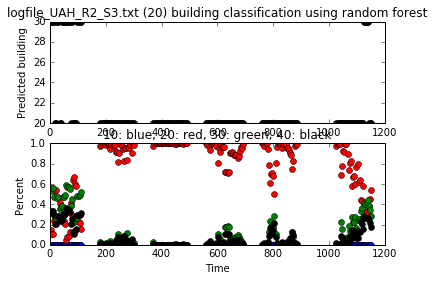

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot results
plt.figure(1)
plt.subplot(211)
plt.title('logfile_UAH_R2_S3.txt (20) building classification using random forest')
plt.plot(test_build[0].index.values, test_build_results[0].values, 'b', 
         test_build[0].index.values, predicted_build[0], 'ko')
plt.xlabel('Time')
plt.ylabel('Predicted building')
plt.subplot(212)
plt.plot(test_build[0].index.values, predicted_build_proba[0][:, 0], 'bo', 
         test_build[0].index.values, predicted_build_proba[0][:, 1], 'ro', 
         test_build[0].index.values, predicted_build_proba[0][:, 2], 'go', 
         test_build[0].index.values, predicted_build_proba[0][:, 3], 'ko')
plt.xlabel('Time')
plt.ylabel('Percent')
plt.title('10: blue, 20: red, 30: green, 40: black')
plt.show()